In [1]:
from numpy import *
from matplotlib.pyplot import *
style.use('seaborn-pastel')

In [2]:
style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
m = 9.10938356e-31
hbar = 1.0545718e-34
omega = 2 * pi * 5e15

xmin = -2e-10
xmax = 2e-10
domain = linspace(xmin, xmax, 100)
v = linspace(0, 1) * 1e-17

In [4]:
def imlazy(x):
    return exp(-m*omega*x**2/(2*hbar))

def psi(x, i=0):
    if i == 0:
        return (m*omega/(pi*hbar))**(1/4) * imlazy(x)
    if i == 1:
        return (m*omega/(pi*hbar))**(1/4) * (2*m*omega/hbar)**(1/2) * x * imlazy(x)
    if i == 2:
        return (m*omega/(pi*hbar))**(1/4) * \
               1/(hbar*sqrt(2)) * \
               (2*m*omega*x**2-hbar) * \
               imlazy(x)        
    
def potential(x):
    return m*omega**2*x**2/2

def En(n):
    return (n + 0.5) * hbar * omega

def scaled(x, i):
    return En(i) + 10**-6 * En(2) * psi(x, i)

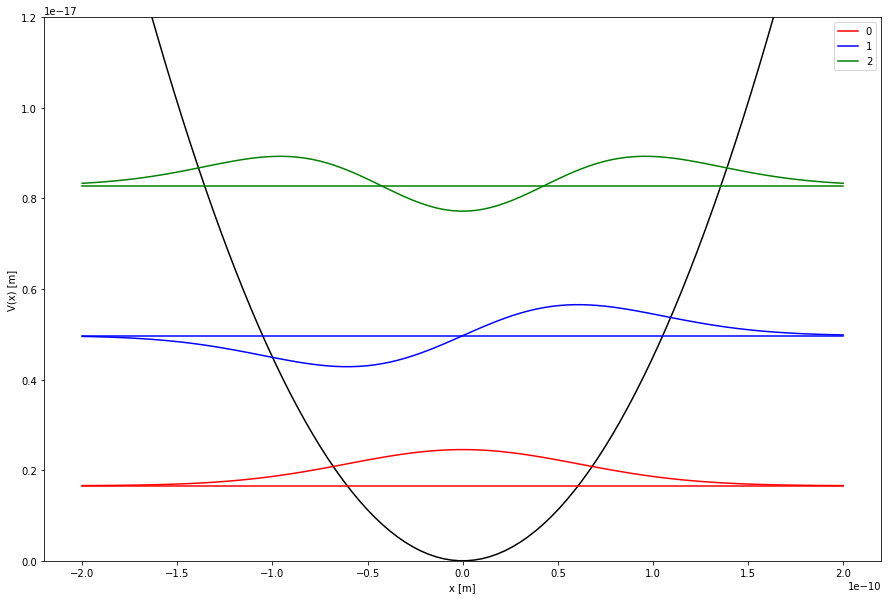

In [7]:
figure(figsize=(15,10))
plot(domain, potential(domain), 'k')
colours = ['r', 'b', 'g']
for i in range(3):
    plot([xmin, xmax], [En(i), En(i)], colours[i])
    plot(domain, scaled(domain, i), colours[i], label=str(i))

ylim([0, 1.2e-17])
legend()    
ylabel("V(x) [m]")
xlabel("x [m]")
show()